In [14]:
import time
import numpy as np
import pandas as pd
from sklearn import cluster, datasets, metrics, utils
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt

In [2]:
# 配置项
# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

聚类图片所用时间为: 0.006380101044972737
Predicting color indices on the full image (k-means)
done in 0.267s.
Predicting color indices on the full image (random)
done in 0.295s.


<Figure size 576x396 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Original image (96,615 colors)')

<Figure size 576x396 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Quantized image (64 colors, K-Means)')

<Figure size 576x396 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Quantized image (64 colors, Random)')

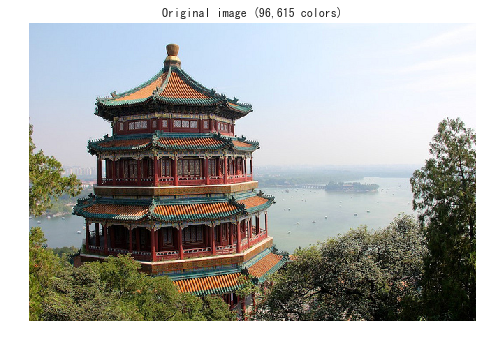

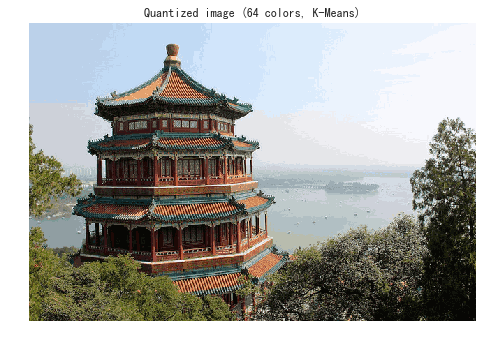

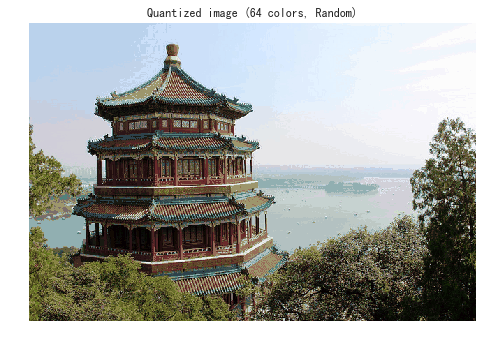

In [24]:
n_colors = 64
china = datasets.load_sample_image("china.jpg")
china =  np.array(china, dtype=np.float64) / 255
w, h, d = original_shape = china.shape
# 如果d不等于3 报错 d为3说明图片是彩色 包含rgb三色通道
assert d == 3

start = time.time()
image_array = np.reshape(china, (w * h, d))
image_array_sample = utils.shuffle(image_array, random_state=0)[:1000]

model = cluster.KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
end = time.time()
print('聚类图片所用时间为:', (end - start) / 60)

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time.time()
labels = model.predict(image_array)
print("done in %0.3fs." % (time.time() - t0))

codebook_random = utils.shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time.time()
labels_random = metrics.pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time.time() - t0))

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(model.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [9]:
original_shape == china.shape

True